### Stock Market Prediction And Forecasting Using Stacked LSTM

In [126]:
### Keras and Tensorflow >2.0

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('JKH.csv')

In [3]:
df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.)
0,8/17/86,133.0,134.00,134.0,0.0,254,665786,88012358.5
1,6/24/24,203.0,207.75,203.0,206.5,155,1019676,209870667.0
2,6/20/24,203.0,205.00,201.0,202.0,258,4856701,980743549.8
3,6/19/24,204.5,205.00,203.0,203.0,111,304446,61856978.0
4,6/18/24,204.0,207.00,203.5,204.0,115,3063874,625034095.8


In [4]:
df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.)
0,8/17/86,133.0,134.00,134.0,0.00,254,665786,88012358.5
1,6/24/24,203.0,207.75,203.0,206.50,155,1019676,209870667.0
2,6/20/24,203.0,205.00,201.0,202.00,258,4856701,980743549.8
3,6/19/24,204.5,205.00,203.0,203.00,111,304446,61856978.0
4,6/18/24,204.0,207.00,203.5,204.00,115,3063874,625034095.8
...,...,...,...,...,...,...,...,...
7612,9/3/91,NaN,275.00,275.0,275.00,2,700,192500.0
7613,9/2/91,NaN,275.00,275.0,275.00,1,150,41250.0
7614,8/30/91,NaN,298.00,297.0,298.00,2,750,223000.0
7615,8/27/91,NaN,315.25,315.0,315.25,5,500,157562.5


In [5]:
df['Trade Date'] = pd.to_datetime(df['Trade Date'])

# Define the date range for the last 10 years
end_date = df['Trade Date'].max()
start_date = end_date - pd.DateOffset(years=10)

# Filter the DataFrame to include only the last 10 years of data
filtered_df = df[(df['Trade Date'] >= start_date) & (df['Trade Date'] <= end_date)]

# Display the filtered DataFrame
print(filtered_df)

C:\Users\udith\AppData\Local\Temp\ipykernel_12660\4235463591.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trade Date'] = pd.to_datetime(df['Trade Date'])


     Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
1    2024-06-24       203.0      207.75     203.00        206.5          155   
2    2024-06-20       203.0      205.00     201.00        202.0          258   
3    2024-06-19       204.5      205.00     203.00        203.0          111   
4    2024-06-18       204.0      207.00     203.50        204.0          115   
5    2024-06-14       202.5      205.50     202.25        205.0           73   
...         ...         ...         ...        ...          ...          ...   
2354 2014-06-30       220.0      220.00     219.70        219.9          186   
2355 2014-06-27       224.9      224.90     219.90        220.1          471   
2356 2014-06-26       224.5      224.50     222.50        222.8          101   
2357 2014-06-25       223.0      224.00     223.00        223.9          151   
2358 2014-06-24       226.0      230.00     220.00        221.8          139   

      ShareVolume  Turnover (Rs.)  
1  

In [6]:
filtered_df.tail()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.)
2354,2014-06-30,220.0,220.0,219.7,219.9,186,2228628,490143889.3
2355,2014-06-27,224.9,224.9,219.9,220.1,471,1735661,383118215.7
2356,2014-06-26,224.5,224.5,222.5,222.8,101,137964,30765918.6
2357,2014-06-25,223.0,224.0,223.0,223.9,151,1099002,245180253.8
2358,2014-06-24,226.0,230.0,220.0,221.8,139,1415163,313176901.0


In [7]:
df1=filtered_df.reset_index()['Close (Rs.)']

In [8]:
df1

0       206.5
1       202.0
2       203.0
3       204.0
4       205.0
        ...  
2353    219.9
2354    220.1
2355    222.8
2356    223.9
2357    221.8
Name: Close (Rs.), Length: 2358, dtype: float64

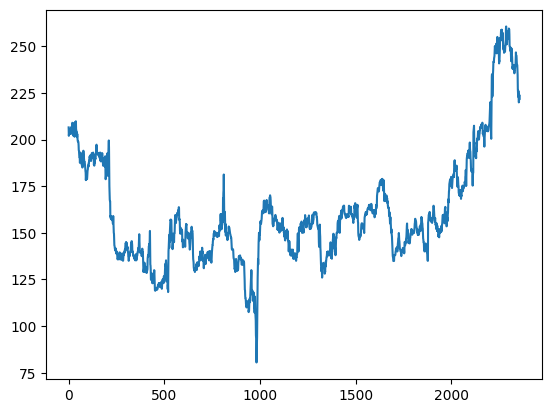

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
import numpy as np

In [12]:
df1

0       206.5
1       202.0
2       203.0
3       204.0
4       205.0
        ...  
2353    219.9
2354    220.1
2355    222.8
2356    223.9
2357    221.8
Name: Close (Rs.), Length: 2358, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.69961133]
 [0.67462521]
 [0.68017768]
 ...
 [0.7901166 ]
 [0.79622432]
 [0.78456413]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(1532, 826)

In [17]:
train_data

array([[0.69961133],
       [0.67462521],
       [0.68017768],
       ...,
       [0.40199889],
       [0.41088284],
       [0.41143809]])

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(1431, 100)
(1431,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(725, 100)
(725,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')




# Summary of the model
model.summary()


C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

# Train the model with EarlyStopping
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test,ytest),  # Use validation data for early stopping
    epochs=100, 
    batch_size=32, 
    callbacks=[early_stop],  # Add EarlyStopping to the training process
    verbose=1
)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0420 - val_loss: 0.0071
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 8.9561e-04 - val_loss: 0.0011
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 9.2664e-04 - val_loss: 0.0012
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5

In [94]:
import tensorflow as tf

In [95]:
tf.__version__

'2.16.1'

In [96]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [97]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [98]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

148.3689471918924

In [99]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, train_predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, train_predict)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Print all the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 147.2858038224061
Mean Squared Error (MSE): 22013.344490830554
Root Mean Squared Error (RMSE): 148.3689471918924


In [100]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

186.1019344613047

In [101]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, test_predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, test_predict)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Print all the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 182.39117185870964
Mean Squared Error (MSE): 34633.93001023975
Root Mean Squared Error (RMSE): 186.1019344613047


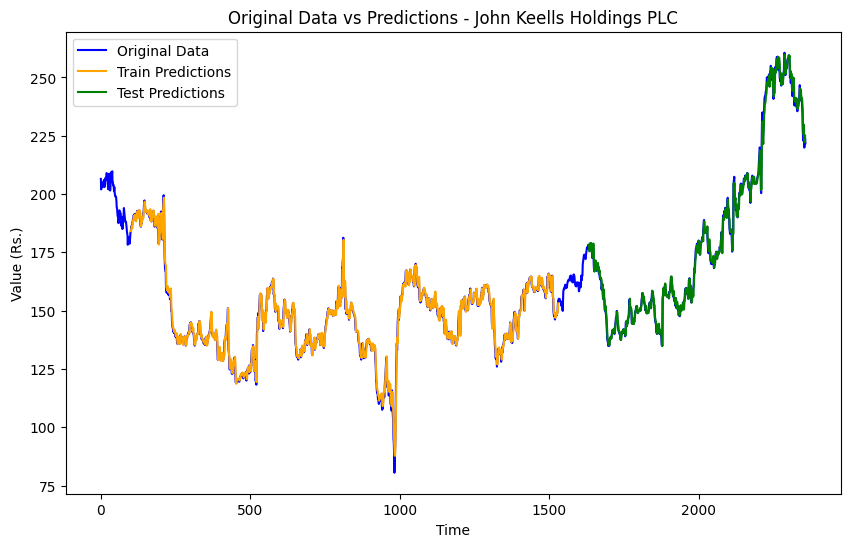

In [112]:
# shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df1), label='Original Data', color='blue')
plt.plot(trainPredictPlot, label='Train Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='green')

# Add title and labels
plt.title('Original Data vs Predictions - John Keells Holdings PLC')
plt.xlabel('Time')
plt.ylabel('Value (Rs.)')

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [103]:
len(test_data)

826

In [104]:
x_input=test_data[726:].reshape(1,-1)
x_input.shape


(1, 100)

In [105]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [106]:
temp_input

[0.9589117157134924,
 0.9689061632426429,
 0.985008328706274,
 0.9894503053858966,
 0.9894503053858966,
 0.985563575791227,
 0.990560799555802,
 0.985563575791227,
 0.9689061632426429,
 0.9583564686285396,
 0.980011104941699,
 0.9811215991116046,
 0.9689061632426429,
 0.9400333148250971,
 0.9361465852304275,
 0.9405885619100499,
 0.9300388672959466,
 0.9400333148250971,
 0.9217101610216546,
 0.9255968906163242,
 0.9300388672959466,
 0.9411438089950027,
 0.9405885619100499,
 0.9250416435313714,
 0.9372570794003331,
 0.946141032759578,
 0.9522487506940588,
 0.9583564686285396,
 0.9955580233203775,
 1.0,
 0.9727928928373125,
 0.9616879511382564,
 0.9466962798445308,
 0.9478067740144364,
 0.9605774569683508,
 0.9677956690727373,
 0.962798445308162,
 0.9639089394780677,
 0.9783453636868406,
 0.9844530816213214,
 0.985563575791227,
 0.985008328706274,
 0.9872293170460854,
 0.993892282065519,
 0.991116046640755,
 0.9916712937257081,
 0.975013881177124,
 0.9411438089950027,
 0.9405885619100499

In [107]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.78859156]
101
1 day input [0.96890616 0.98500833 0.98945031 0.98945031 0.98556358 0.9905608
 0.98556358 0.96890616 0.95835647 0.9800111  0.9811216  0.96890616
 0.94003331 0.93614659 0.94058856 0.93003887 0.94003331 0.92171016
 0.92559689 0.93003887 0.94114381 0.94058856 0.92504164 0.93725708
 0.94614103 0.95224875 0.95835647 0.99555802 1.         0.97279289
 0.96168795 0.94669628 0.94780677 0.96057746 0.96779567 0.96279845
 0.96390894 0.97834536 0.98445308 0.98556358 0.98500833 0.98722932
 0.99389228 0.99111605 0.99167129 0.97501388 0.94114381 0.94058856
 0.93836757 0.92781788 0.93836757 0.93559134 0.93503609 0.91338145
 0.89672404 0.90227651 0.91338145 0.9339256  0.91338145 0.91004997
 0.8856191  0.87451416 0.87951138 0.88062188 0.87451416 0.88284287
 0.88117712 0.8856191  0.87451416 0.86840644 0.86896169 0.86063298
 0.86785119 0.86896169 0.87451416 0.87840089 0.88450861 0.88506385
 0.91060522 0.92282066 0.91338145 0.91338145 0.91282621 0.89894503
 0.88728484 0.8856191  0.8856191  

In [108]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [109]:
import matplotlib.pyplot as plt

In [69]:
len(df1)

2358

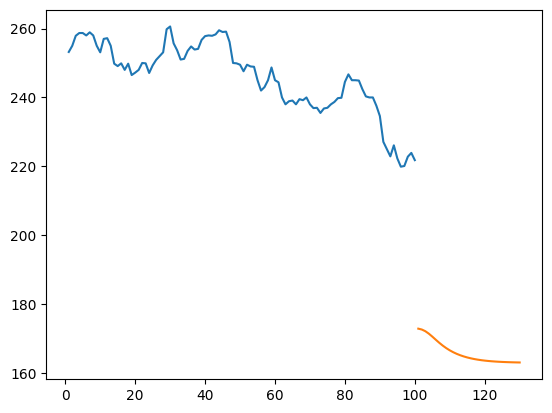

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[2258:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

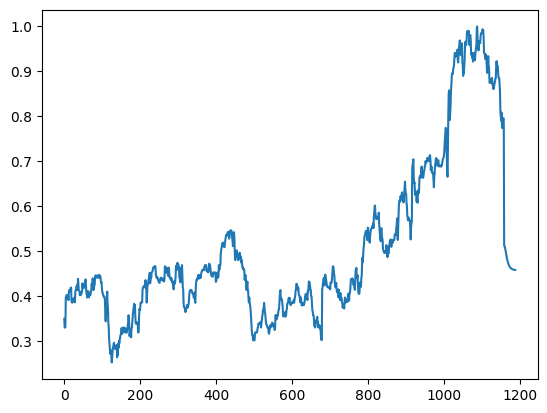

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [72]:
df3=scaler.inverse_transform(df3).tolist()

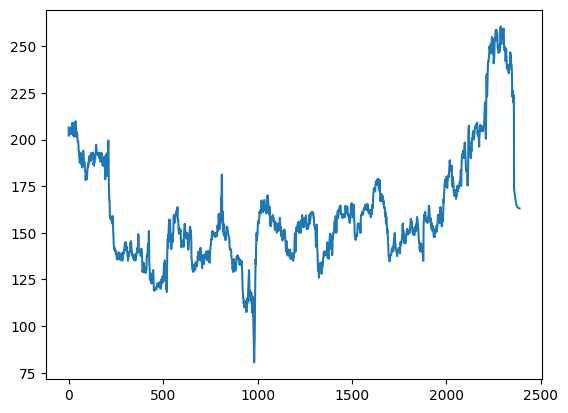

In [73]:
plt.plot(df3)